# Steam Games Dataset Exploratory Analysis
### Kadin McWilliams and Zoe Mecklenburg

### Downloading the data and checking out the empty spaces

In [1]:
#importing important libraries
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas as pd

#turns off warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
#uploading the file and making sure it's correct
gm=pd.read_csv("games.csv")
gm.head()

#link to data source: https://www.kaggle.com/datasets/fronkongames/steam-games-dataset

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [3]:
#initial check out of the dataset
gm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85103 entries, 0 to 85102
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       85103 non-null  int64  
 1   Name                        85097 non-null  object 
 2   Release date                85103 non-null  object 
 3   Estimated owners            85103 non-null  object 
 4   Peak CCU                    85103 non-null  int64  
 5   Required age                85103 non-null  int64  
 6   Price                       85103 non-null  float64
 7   DLC count                   85103 non-null  int64  
 8   About the game              81536 non-null  object 
 9   Supported languages         85103 non-null  object 
 10  Full audio languages        85103 non-null  object 
 11  Reviews                     9743 non-null   object 
 12  Header image                85103 non-null  object 
 13  Website                     394

In [4]:
#checking out all the column names
gm.columns

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')

## Cleaning up that data for analysis

In [5]:
#looking at how many empty spaces we have
gm.isnull().sum()

AppID                             0
Name                              6
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
DLC count                         0
About the game                 3567
Supported languages               0
Full audio languages              0
Reviews                       75360
Header image                      0
Website                       45651
Support url                   43511
Support email                 13593
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Metacritic url                81191
User score                        0
Positive                          0
Negative                          0
Score rank                    85059
Achievements                      0
Recommendations                   0
Notes                       

In [6]:
#finding percentages of missing values
(gm.isnull().sum()/85103)*100

AppID                          0.000000
Name                           0.007050
Release date                   0.000000
Estimated owners               0.000000
Peak CCU                       0.000000
Required age                   0.000000
Price                          0.000000
DLC count                      0.000000
About the game                 4.191392
Supported languages            0.000000
Full audio languages           0.000000
Reviews                       88.551520
Header image                   0.000000
Website                       53.642057
Support url                   51.127457
Support email                 15.972410
Windows                        0.000000
Mac                            0.000000
Linux                          0.000000
Metacritic score               0.000000
Metacritic url                95.403217
User score                     0.000000
Positive                       0.000000
Negative                       0.000000
Score rank                    99.948298


In [7]:
#filling empty space
gm.fillna('NaN',inplace=True)

In [8]:
#making sure the spaces were filled
gm.isnull().sum()

AppID                         0
Name                          0
Release date                  0
Estimated owners              0
Peak CCU                      0
Required age                  0
Price                         0
DLC count                     0
About the game                0
Supported languages           0
Full audio languages          0
Reviews                       0
Header image                  0
Website                       0
Support url                   0
Support email                 0
Windows                       0
Mac                           0
Linux                         0
Metacritic score              0
Metacritic url                0
User score                    0
Positive                      0
Negative                      0
Score rank                    0
Achievements                  0
Recommendations               0
Notes                         0
Average playtime forever      0
Average playtime two weeks    0
Median playtime forever       0
Median p

In [9]:
#replacing spaces in titles
gm.columns=[column.replace(" ", "_") for column in gm.columns]

## Dropping columns for easier data analysis

In [10]:
gm_new=gm
gm_new.drop(['About_the_game','Median_playtime_two_weeks',
             'Categories','Screenshots','Tags','Average_playtime_two_weeks',
             'Score_rank','AppID','Reviews','Header_image','Movies'],axis=1, inplace=True) 
#The dropped data was either links, redundant data or information that could not be used

In [11]:
gm_new.sample(10)

,Name,Release_date,Estimated_owners,Peak_CCU,Required_age,Price,DLC_count,Supported_languages,Full_audio_languages,Website,...,Positive,Negative,Achievements,Recommendations,Notes,Average_playtime_forever,Median_playtime_forever,Developers,Publishers,Genres
28630,The Legend of The Sacred Stone EX,"Mar 11, 2022",50000 - 100000,3,0,7.99,0,['Traditional Chinese'],['Traditional Chinese'],NaN,...,219,14,0,219,NaN,0,0,"USERJOY Technology Co.,Ltd.","USERJOY Technology Co.,Ltd.","Adventure,RPG"
25789,DoHots,"Apr 26, 2021",0 - 20000,1,0,14.99,1,['English'],[],https://www.dohots.com/,...,0,0,0,0,"Explicit sexual content, targeted only for adu...",0,0,AChat Animation Studios,AChat Animation Studios,"Casual,RPG"
48462,Warsworn: DRAGON OF JAPAN - EMPIRE EDITION,"May 25, 2020",0 - 20000,0,0,19.99,0,"['English', 'Simplified Chinese', 'Spanish - S...","['English', 'Japanese']",https://interskystudios.com/,...,12,18,0,0,NaN,0,0,Intersky Studios,Intersky Studios,"Action,Casual,Indie,Simulation,Strategy"
63071,SUN SHOT,"Sep 3, 2022",0 - 20000,0,0,7.79,0,"['English', 'Russian']",[],NaN,...,0,0,0,0,NaN,0,0,NIK Studios,NIK Studios,Action
36253,VR Nostalgia 5,"Sep 29, 2019",0 - 20000,0,0,0.99,0,"['English', 'Korean']",[],NaN,...,0,0,0,0,NaN,0,0,VR Gallery,VR Gallery,"Design & Illustration,Education"
12792,GameGuru Classic,"May 19, 2015",200000 - 500000,24,0,12.49,25,['English'],['English'],https://www.game-guru.com/,...,1454,538,0,1159,NaN,485,66,TheGameCreators,TheGameCreators,"Animation & Modeling,Design & Illustration,Edu..."
77820,Episode 1 - A Boy Learns What Fear Is,"Jan 6, 2014",0 - 20000,0,0,0.00,0,['English'],['English'],https://spicyworld.spicyhorse.com/main/grimm.html,...,82,12,0,0,NaN,0,0,Spicy Horse Games,Spicy Horse Games,"Casual,Indie"
57132,Ghost Pirates of Vooju Island,"Jan 27, 2015",0 - 20000,0,0,9.99,0,"['English', 'German']","['English', 'German']",NaN,...,41,33,0,0,NaN,0,0,Autumn Moon,Viva Media,"Adventure,Casual"
4787,ArkanoidSmoking,"Aug 14, 2017",0 - 20000,0,0,0.99,0,"['English', 'Russian']",[],http://www.vsemagy.ru/index.php,...,4,7,0,0,NaN,0,0,StalkerAlex..,StalkerAlex.,"Casual,Indie"
82239,三千大世界(Three Thousand Worlds),"Nov 28, 2023",0 - 20000,9,0,8.99,0,['Simplified Chinese'],['Simplified Chinese'],NaN,...,1,2,0,0,NaN,0,0,yunbei,yunbei,"Action,Adventure,Massively Multiplayer,RPG"


## Converting times to datetime and adding a months and year column

In [12]:
gm_new['Release_date']=pd.to_datetime(gm_new['Release_date'])#converting to datetime 
gm_new['Month']=gm_new['Release_date'].dt.month #converting to months
gm_new['Year']=gm_new['Release_date'].dt.year # converting to years
gm_new.head()

,Name,Release_date,Estimated_owners,Peak_CCU,Required_age,Price,DLC_count,Supported_languages,Full_audio_languages,Website,...,Achievements,Recommendations,Notes,Average_playtime_forever,Median_playtime_forever,Developers,Publishers,Genres,Month,Year
0,Galactic Bowling,2008-10-21,0 - 20000,0,0,19.99,0,['English'],[],http://www.galacticbowling.net,...,30,0,NaN,0,0,Perpetual FX Creative,Perpetual FX Creative,"Casual,Indie,Sports",10,2008
1,Train Bandit,2017-10-12,0 - 20000,0,0,0.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],http://trainbandit.com,...,12,0,NaN,0,0,Rusty Moyher,Wild Rooster,"Action,Indie",10,2017
2,Jolt Project,2021-11-17,0 - 20000,0,0,4.99,0,"['English', 'Portuguese - Brazil']",[],NaN,...,0,0,NaN,0,0,Campião Games,Campião Games,"Action,Adventure,Indie,Strategy",11,2021
3,Henosis™,2020-07-23,0 - 20000,0,0,5.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],https://henosisgame.com/,...,0,0,NaN,0,0,Odd Critter Games,Odd Critter Games,"Adventure,Casual,Indie",7,2020
4,Two Weeks in Painland,2020-02-03,0 - 20000,0,0,0.00,0,"['English', 'Spanish - Spain']",[],https://www.unusual-games.com/home/,...,17,0,This Game may contain content not appropriate ...,0,0,Unusual Games,Unusual Games,"Adventure,Indie",2,2020


## Basic data description

In [13]:
gm_new.describe()

,Peak_CCU,Required_age,Price,DLC_count,Metacritic_score,User_score,Positive,Negative,Achievements,Recommendations,Average_playtime_forever,Median_playtime_forever,Month,Year
count,85103.000000,85103.000000,85103.000000,85103.000000,85103.000000,85103.000000,8.510300e+04,85103.000000,85103.000000,8.510300e+04,85103.000000,85103.000000,85103.000000,85103.000000
mean,134.872930,0.312774,7.193703,0.543412,3.348366,0.039822,9.585609e+02,159.772570,19.859394,7.755176e+02,104.729681,93.316029,6.789197,2019.802921
std,5403.548851,2.254721,12.362478,13.721223,15.421471,1.791013,2.435920e+04,4574.583903,171.446874,1.789338e+04,1142.447517,1510.732101,3.423632,2.894896
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1997.000000
25%,0.000000,0.000000,0.990000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,4.000000,2018.000000
50%,0.000000,0.000000,4.490000,0.000000,0.000000,0.000000,7.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,7.000000,2020.000000
75%,1.000000,0.000000,9.990000,0.000000,0.000000,0.000000,4.500000e+01,14.000000,18.000000,0.000000e+00,0.000000,0.000000,10.000000,2022.000000
max,872138.000000,21.000000,999.980000,2366.000000,97.000000,100.000000,5.764420e+06,895978.000000,9821.000000,3.441592e+06,145727.000000,208473.000000,12.000000,2025.000000


## Pair plot overview

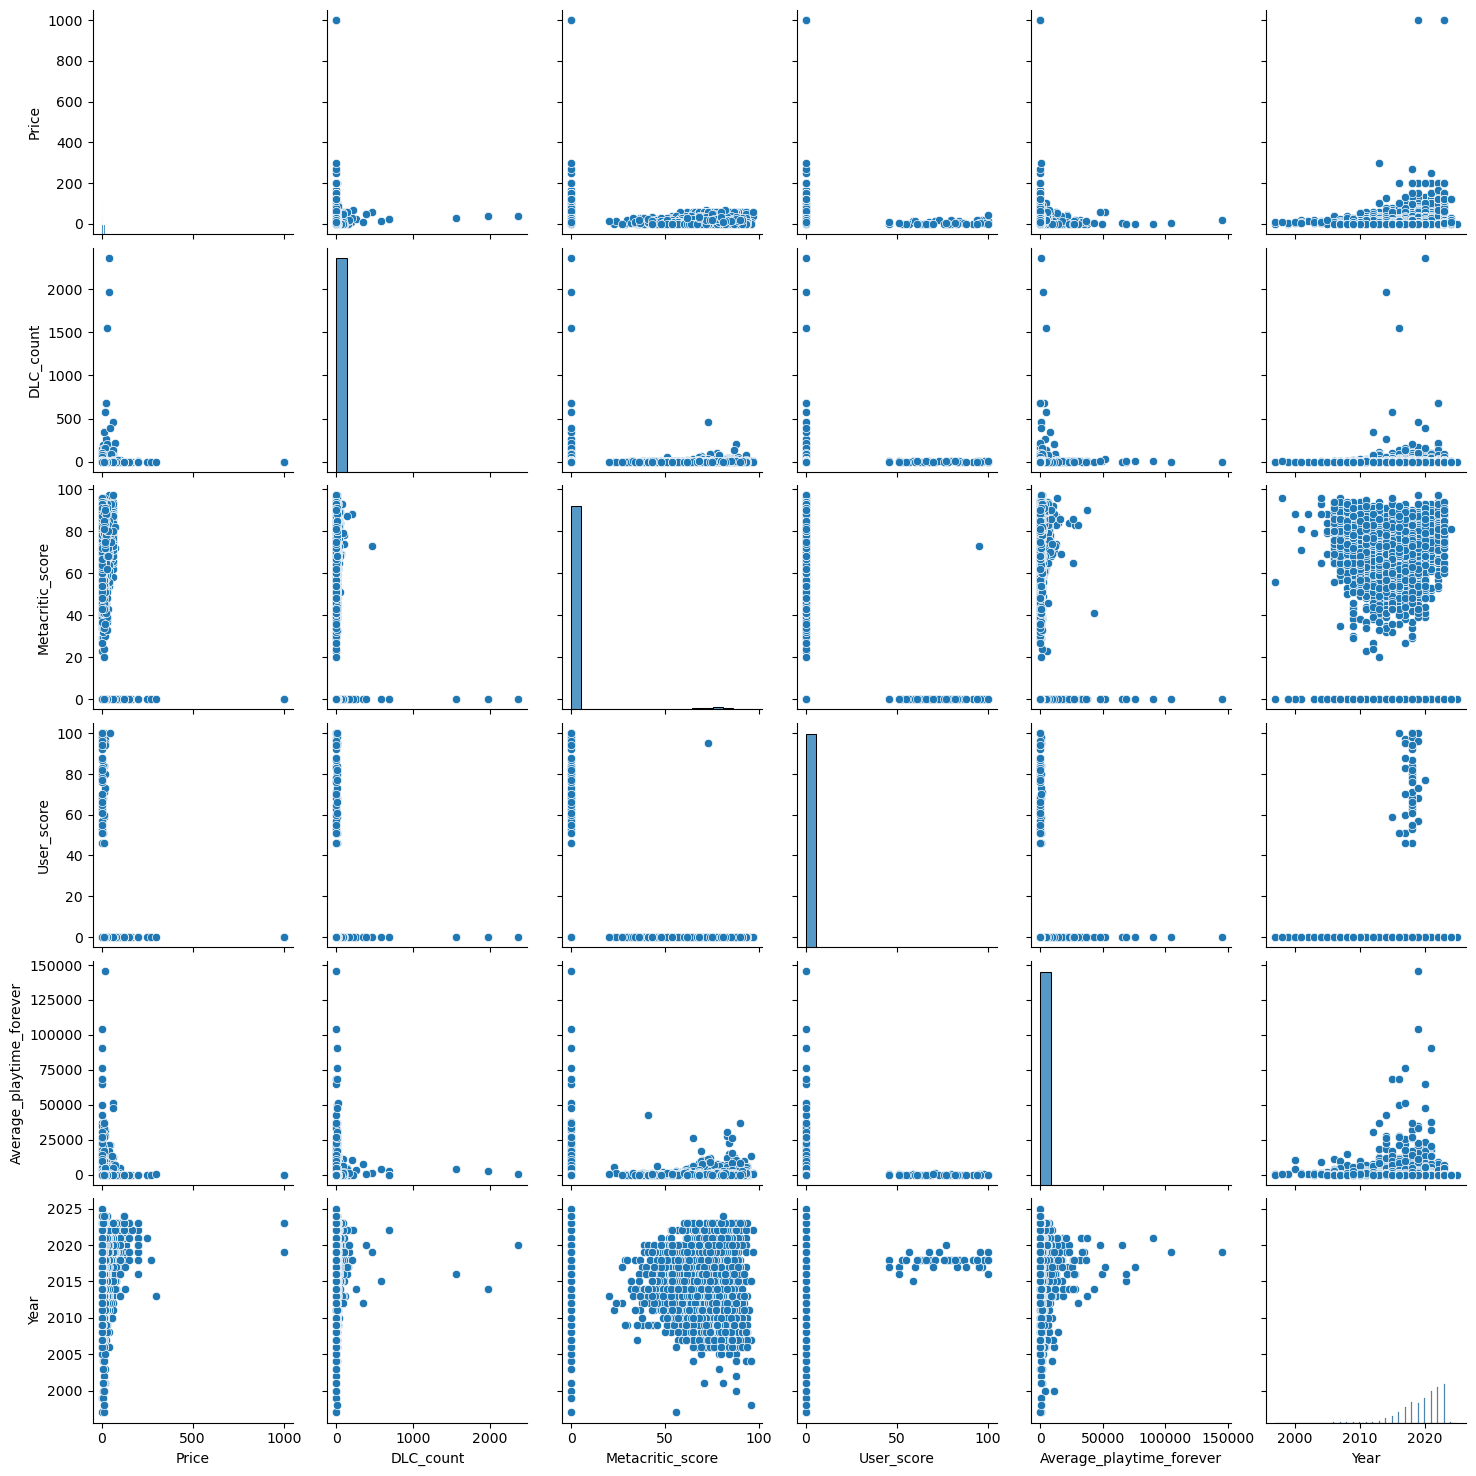

In [15]:
sns.pairplot(gm_new[['Price','DLC_count','Metacritic_score','User_score','Average_playtime_forever',
                    'Year']])
plt.show()

## Heat map 

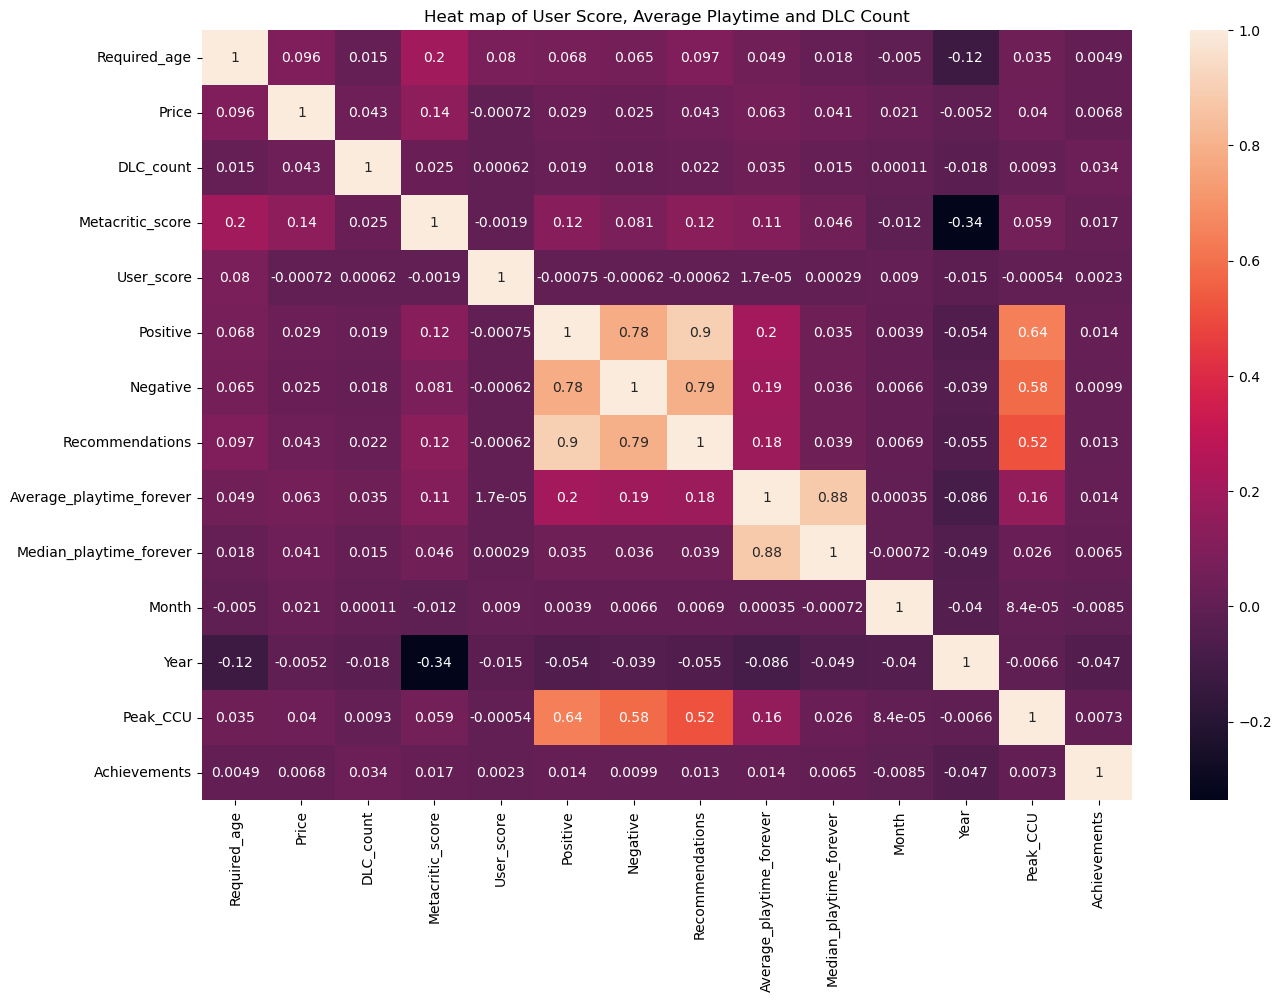

In [14]:
## Visualization of 3 data points
condata=gm_new[['Required_age',
        'Price','DLC_count','Metacritic_score','User_score','Positive','Negative','Recommendations','Average_playtime_forever',
       'Median_playtime_forever','Month','Year','Peak_CCU','Achievements']].corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(condata, annot=True)
plt.title("Heat map of User Score, Average Playtime and DLC Count")
plt.show()


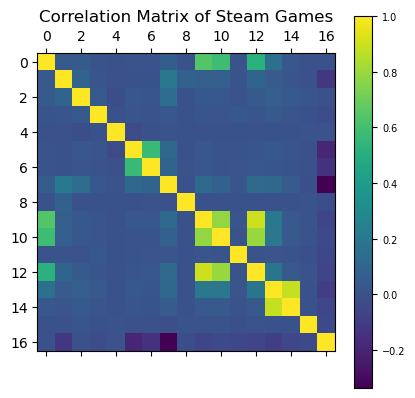

In [21]:
plt.matshow(gm_new.corr())
plt.colorbar().ax.tick_params(labelsize=7)
plt.title('Correlation Matrix of Steam Games')

plt.show()

In [23]:
condata.to_csv("CorrelationTable.csv", 
          index=False)

## Findings
- Metacritic score seems to not have a strong correlation to if a game is recieves reccomendations on steam or not 
- Strong correlation between reccomendations and if there are positive or negative 
- Positive reccomendations tend to have a stronge correlation in peak congrent players
- Negative reccomendations and reccomendations tended to have a moderate correlations to peak CCU
- All other factors do not have strong correlations between each other


## Finding out most popular types of games on steam

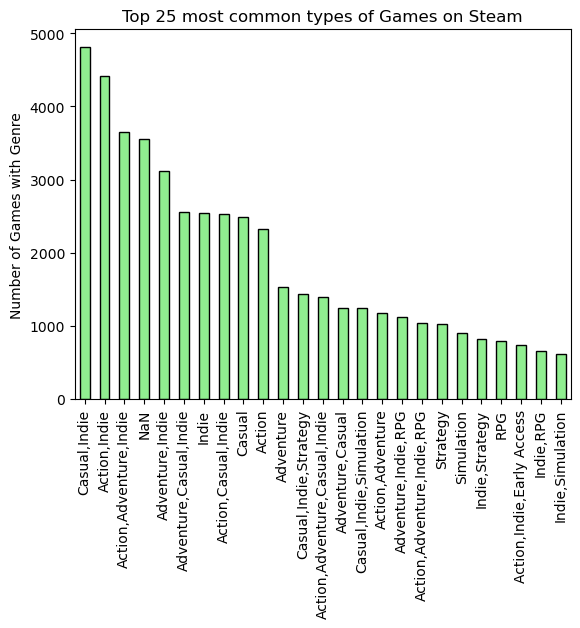

In [17]:
gm_new['Genres'].value_counts().head(25).plot(kind="bar",facecolor="lightgreen",edgecolor="black")
plt.title("Top 25 most common types of Games on Steam")
plt.ylabel("Number of Games with Genre")
plt.show()

## Findings

### Overall top 5 genres
- Casual, Indie
- Action, Indie
- Action, Adventure, Indie
- Adventure, Indie 
- Adventure, Casual, Indie
### Overall top 5 solo categories
- Indie
- Casual 
- Action
- Adventure
- Strategy

### Summary 
Indie is the most popular genre of game created and is included in the overall top 5 genres and in the solo categories. Solo categories tended to be less popular and a combination of genres seems to be the most popular type of game that is developed. The overall genres are a mixture of the top 4 solo categories on the steam games website.

## Finding the most popular games on steam by peak concurrent players

In [18]:
pie5=gm_new.nlargest(10, 'Peak_CCU')
pie5

,Name,Release_date,Estimated_owners,Peak_CCU,Required_age,Price,DLC_count,Supported_languages,Full_audio_languages,Website,...,Achievements,Recommendations,Notes,Average_playtime_forever,Median_playtime_forever,Developers,Publishers,Genres,Month,Year
69429,Hogwarts Legacy,2023-02-10,5000000 - 10000000,872138,0,59.99,1,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp...",https://www.hogwartslegacy.com/,...,45,55658,NaN,661,501,Avalanche Software,Warner Bros. Games,"Action,Adventure,RPG",2,2023
46158,Counter-Strike: Global Offensive,2012-08-21,50000000 - 100000000,825215,0,0.00,1,"['Czech', 'Danish', 'Dutch', 'English', 'Finni...","['English', 'Vietnamese']",http://blog.counter-strike.net/,...,167,3441592,Includes intense violence and blood.,30484,6357,"Valve,Hidden Path Entertainment",Valve,"Action,Free to Play",8,2012
17585,Dota 2,2013-07-09,100000000 - 200000000,558759,0,0.00,2,"['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['English', 'Korean', 'Simplified Chinese', 'V...",http://www.dota2.com/,...,0,14300,NaN,37162,880,Valve,Valve,"Action,Free to Play,Strategy",7,2013
70064,Sons Of The Forest,2023-02-23,2000000 - 5000000,405191,0,29.99,0,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'Turkish']",NaN,...,28,49027,"Sons Of The Forest contains intense violence, ...",312,238,Endnight Games Ltd,Newnight,"Action,Adventure,Indie,Simulation,Early Access",2,2023
47658,Lost Ark,2022-02-11,20000000 - 50000000,287501,17,0.00,4,"['English', 'French', 'German', 'Spanish - Spa...","['English', 'French', 'German', 'Spanish - Spa...",https://www.playlostark.com,...,156,59685,This Game may contain content not appropriate ...,3335,836,Smilegate RPG,Amazon Games,"Action,Adventure,Free to Play,Massively Multip...",2,2022
8885,PUBG: BATTLEGROUNDS,2017-12-21,50000000 - 100000000,275374,0,0.00,0,"['English', 'Korean', 'Simplified Chinese', 'F...",[],http://www.pubg.com,...,37,1616422,NaN,21963,7134,"KRAFTON, Inc.","KRAFTON, Inc.","Action,Adventure,Free to Play,Massively Multip...",12,2017
736,Apex Legends™,2020-11-04,20000000 - 50000000,235067,0,0.00,2,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp...",https://www.ea.com/games/apex-legends,...,12,1000,NaN,6388,904,Respawn Entertainment,Electronic Arts,"Action,Adventure,Free to Play",11,2020
65186,Call of Duty®: Modern Warfare® II,2022-10-27,2000000 - 5000000,233454,18,69.99,1,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp...",https://www.callofduty.com/modernwarfare2,...,24,28253,NaN,787,727,"Infinity Ward,Raven Software,Beenox,Treyarch,H...",Activision,Action,10,2022
57205,Grand Theft Auto V,2015-04-13,20000000 - 50000000,170527,17,0.00,1,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'Spanish - Latin America']",http://www.rockstargames.com/V/,...,77,1247051,NaN,13650,6274,Rockstar North,Rockstar Games,"Action,Adventure",4,2015
81830,Lethal Company,2023-10-23,5000000 - 10000000,169110,0,9.99,0,['English'],['English'],NaN,...,0,97709,The game has a realistic atmosphere. Player ch...,472,328,Zeekerss,Zeekerss,"Action,Adventure,Indie,Early Access",10,2023


## Top 5 Games on steam
- Hogwarts Legacy
- Counter-Strike: Global Offensive
- Dota 2
- Sons Of The Forest	
- Lost Ark

Top games all inlcude action in them

## Linear distribution plot of Peak CCU vs Recommendations

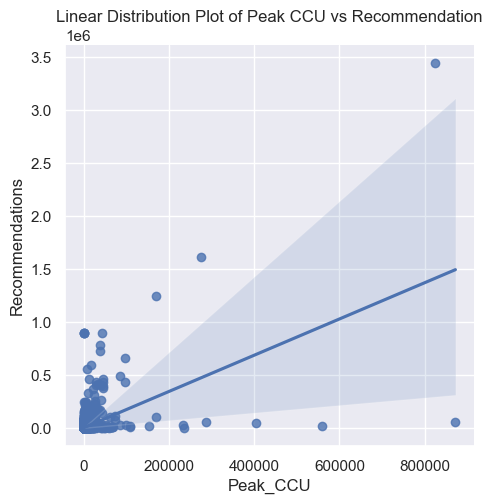

In [19]:
sns.set(rc={'figure.figsize':(30,40)})
sns.lmplot(x='Peak_CCU',y='Recommendations',data=gm_new)
plt.title('Linear Distribution Plot of Peak CCU vs Recommendation')
plt.show()

## Investigating impact of the Peak CCU on Positive and Negative Reviews

In [14]:
print('Maximums of the three columns:')
peak=max(gm_new['Peak_CCU'])
pos=max(gm_new['Positive'])
neg=max(gm_new['Negative'])
print(peak,pos,neg)

Maximums of the three columns:
872138 5764420 895978


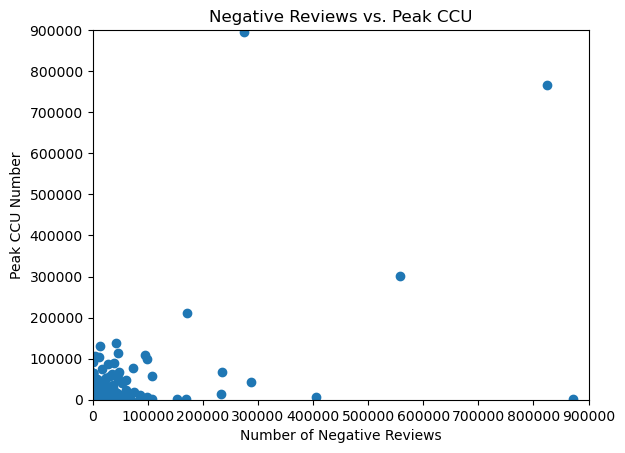

In [17]:
#Negative reviews
plt.scatter(gm_new['Peak_CCU'],gm_new['Negative'])
plt.xlim(0,900000)
plt.ylim(0,900000)
plt.xlabel("Number of Negative Reviews")
plt.ylabel("Peak CCU Number")
plt.title("Negative Reviews vs. Peak CCU")
plt.show()

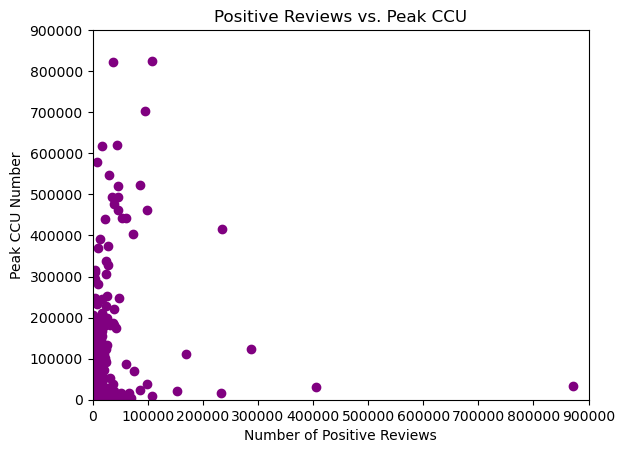

In [18]:
#positive reviews
plt.scatter(gm_new['Peak_CCU'],gm_new['Positive'],color='purple')
plt.xlim(0,900000)
plt.ylim(0,900000)
plt.xlabel("Number of Positive Reviews")
plt.ylabel("Peak CCU Number")
plt.title("Positive Reviews vs. Peak CCU")
plt.show()

### Findings
#### Almost vertical line of best fit in positive reviews and possible rising line of best fit in negative reviews.
#### Negative plot is extremely spread out.

### Summary
#### The possible correlation shown on the heat map appears to be false. We can see on the Positive Review scatterplot that the Peak CCU has almost no affect on the number of positive reviews, like suggested previously. And, on the flip side, we can see on the Negative Review scatterplot that the information is too scattered to show any true correlation.

## How many players are on mac vs windows vs linux?

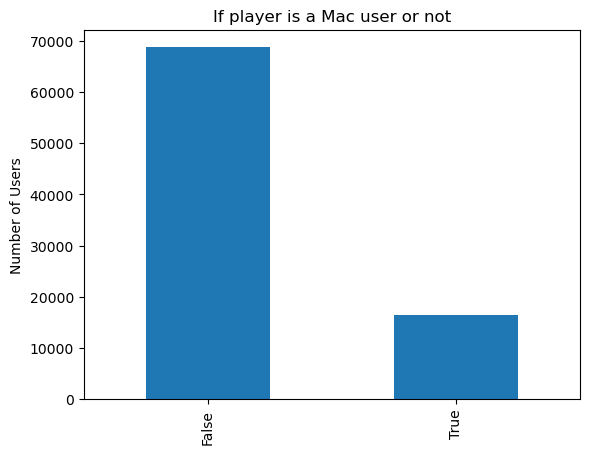

In [19]:
#Mac graph
gm_new['Mac'].value_counts().plot(kind='bar')
plt.title("If player is a Mac user or not")
plt.ylabel('Number of Users')
plt.show()

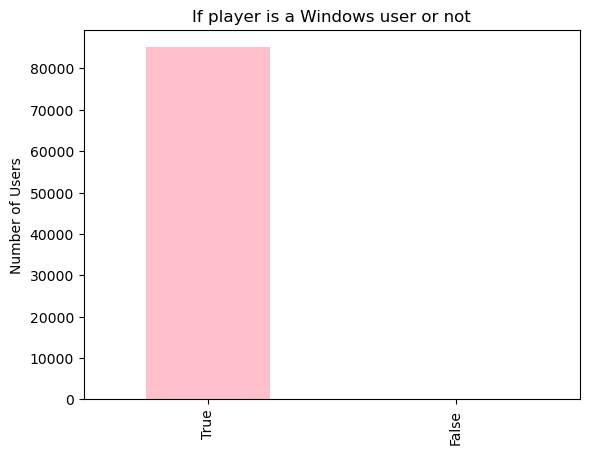

In [20]:
#Windows Graph
gm_new['Windows'].value_counts().plot(kind='bar',color='pink')
plt.title("If player is a Windows user or not")
plt.ylabel('Number of Users')
plt.show()

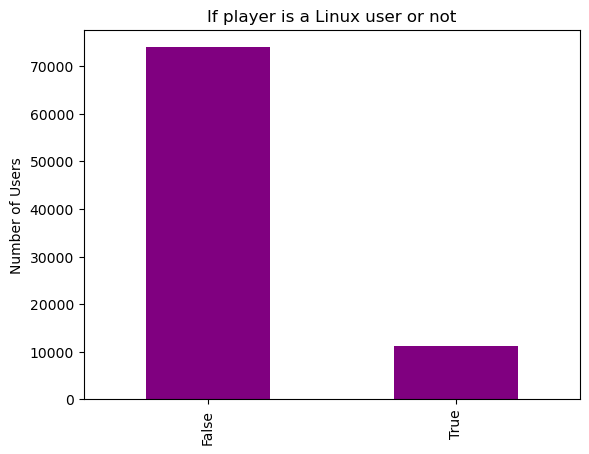

In [21]:
#Linux Graph
gm_new['Linux'].value_counts().plot(kind='bar',color='purple')
plt.title("If player is a Linux user or not")
plt.ylabel('Number of Users')
plt.show()

## Findings
- Linx and Max users are relatively the same in usage and are also rare amoung what type of system is being used
- Windows is the dominante operating system

In [17]:
gm_new.to_csv("TP1.csv", 
          index=False)